In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/jeonmyeong-un/Desktop/chromedriver')
url = 'https://coronaboard.com/global/'
driver.get(url)

In [8]:
from selenium.webdriver import ActionChains
some_tag = driver.find_element_by_id('show-more')
ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()

ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()

some_tag = driver.find_element_by_xpath('//*[@id="global-slide"]/div/div[2]/div/div/button')
ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()

driver.find_element_by_xpath('//*[@id="bs-select-1-0"]').click()
driver.find_element_by_xpath('//*[@id="bs-select-1-1"]').click()
driver.find_element_by_xpath('//*[@id="bs-select-1-5"]').click()

ElementNotInteractableException: Message: element not interactable: [object HTMLButtonElement] has no size and location
  (Session info: chrome=91.0.4472.114)


In [9]:
all_data = []
for i in range(2, 11):
    tmp = '//*[@id="country-table"]/div/div/table/tbody/tr/td[{}]'.format(i)
    sel_ele = driver.find_elements_by_xpath(tmp)

    column_data = []
    for one in sel_ele:
        column_data.append(one.text)
    all_data.append(column_data)
    
print(all_data)

[['USA🇺🇸', 'India🇮🇳', 'Brazil🇧🇷', 'France🇫🇷', 'Russia🇷🇺', 'Turkey🇹🇷', 'UK🇬🇧', 'Argentina🇦🇷', 'Italy🇮🇹', 'Colombia🇨🇴', 'Spain🇪🇸', 'Germany🇩🇪', 'Iran🇮🇷', 'Poland🇵🇱', 'Mexico🇲🇽', 'Ukraine🇺🇦', 'Indonesia🇮🇩', 'Peru🇵🇪', 'South Africa🇿🇦', 'Netherlands🇳🇱', 'Czechia🇨🇿', 'Chile🇨🇱', 'Canada🇨🇦', 'Philippines🇵🇭', 'Iraq🇮🇶', 'Sweden🇸🇪', 'Belgium🇧🇪', 'Romania🇷🇴', 'Pakistan🇵🇰', 'Bangladesh🇧🇩', 'Portugal🇵🇹', 'Israel🇮🇱', 'Hungary🇭🇺', 'Japan🇯🇵*', 'Jordan🇯🇴', 'Malaysia🇲🇾', 'Serbia🇷🇸', 'Switzerland🇨🇭', 'Austria🇦🇹', 'Nepal🇳🇵', 'UAE🇦🇪', 'Lebanon🇱🇧', 'Morocco🇲🇦', 'Saudi Arabia🇸🇦', 'Ecuador🇪🇨', 'Bolivia🇧🇴', 'Bulgaria🇧🇬', 'Greece🇬🇷', 'Kazakhstan🇰🇿', 'Belarus🇧🇾', 'Paraguay🇵🇾', 'Panama🇵🇦', 'Slovakia🇸🇰', 'Tunisia🇹🇳', 'Georgia🇬🇪', 'Uruguay🇺🇾', 'Croatia🇭🇷', 'Costa Rica🇨🇷', 'Kuwait🇰🇼', 'Azerbaijan🇦🇿', 'Dominican Republic🇩🇴', 'Palestine🇵🇸', 'Denmark🇩🇰', 'Guatemala🇬🇹', 'Egypt🇪🇬', 'Lithuania🇱🇹', 'Ethiopia🇪🇹', 'Ireland🇮🇪', 'Venezuela🇻🇪', 'Bahrain🇧🇭', 'Slovenia🇸🇮', 'Oman🇴🇲', 'Moldova🇲🇩', 'Honduras🇭🇳', 'Sri Lanka🇱🇰', 'Thail

In [10]:
import pandas as pd
dict_dat = { '국가':all_data[0],
            '확진자':all_data[1],
            '치료중':all_data[2],
            '사망자':all_data[3],
            '완치':all_data[4],
            '치명률':all_data[5],
            '완치율':all_data[6],
            '발생률':all_data[7],
            '전체인구':all_data[8]   
 }

In [11]:
dat = pd.DataFrame(dict_dat)
# 확진자, 확진자1일
dat['확진자수'] = dat['확진자'].str.split('\n').str[0]
dat['확진자1일'] = dat['확진자'].str.split('\n').str[1]

# 치료중, 치료중1일
dat['치료중_합계'] = dat['치료중'].str.split('\n').str[0]
dat['치료중1일'] = dat['치료중'].str.split('\n').str[1]

# 사망자, 사망자1일
dat['사망자'] = dat['사망자'].str.split('\n').str[0]
dat['사망자1일'] = dat['사망자'].str.split('\n').str[1]

# 완치, 완치1일
dat['완치합계'] = dat['완치'].str.split('\n').str[0]
dat['완치1일'] = dat['완치'].str.split('\n').str[1]

dat = dat.drop( [ '확진자','치료중','사망자', '완치'], axis=1)
dat.to_excel('today_corona_confirmed_ten.xlsx', index=False) 

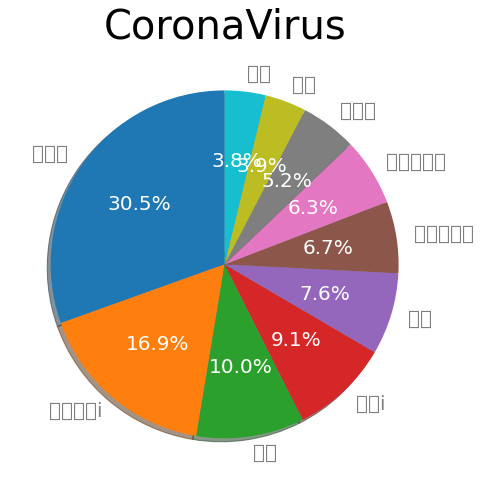

In [13]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 23
plt.rcParams['figure.figsize'] = (13, 8)
labels = ['브라질', '콜롬비아i', '미국', '인도i', '영국', '남아프리카','아르헨티나','스페인','터키','칠레']
sizes = [41878,23239, 13779, 12569, 10467, 9160, 8606,7209,5294,5205]
explode = (0.3, 0, 0, 0, 0, 0)
# text, autotext 인자를 활용하여 텍스트 스타일링을 적용한다
patches, texts, autotexts = plt.pie(sizes,
                                    labels = labels,
                                    autopct = '%1.1f%%',
                                    shadow = True,
                                    startangle=90)
plt.title('CoronaVirus', fontsize=40)
# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(20)
    t.set_color('gray')
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_fontsize(20)
    t.set_color('white')
plt.show()

NameError: name 'sns' is not defined

findfont: Font family ['Nanum Brush Script'] not found. Falling back to DejaVu Sans.


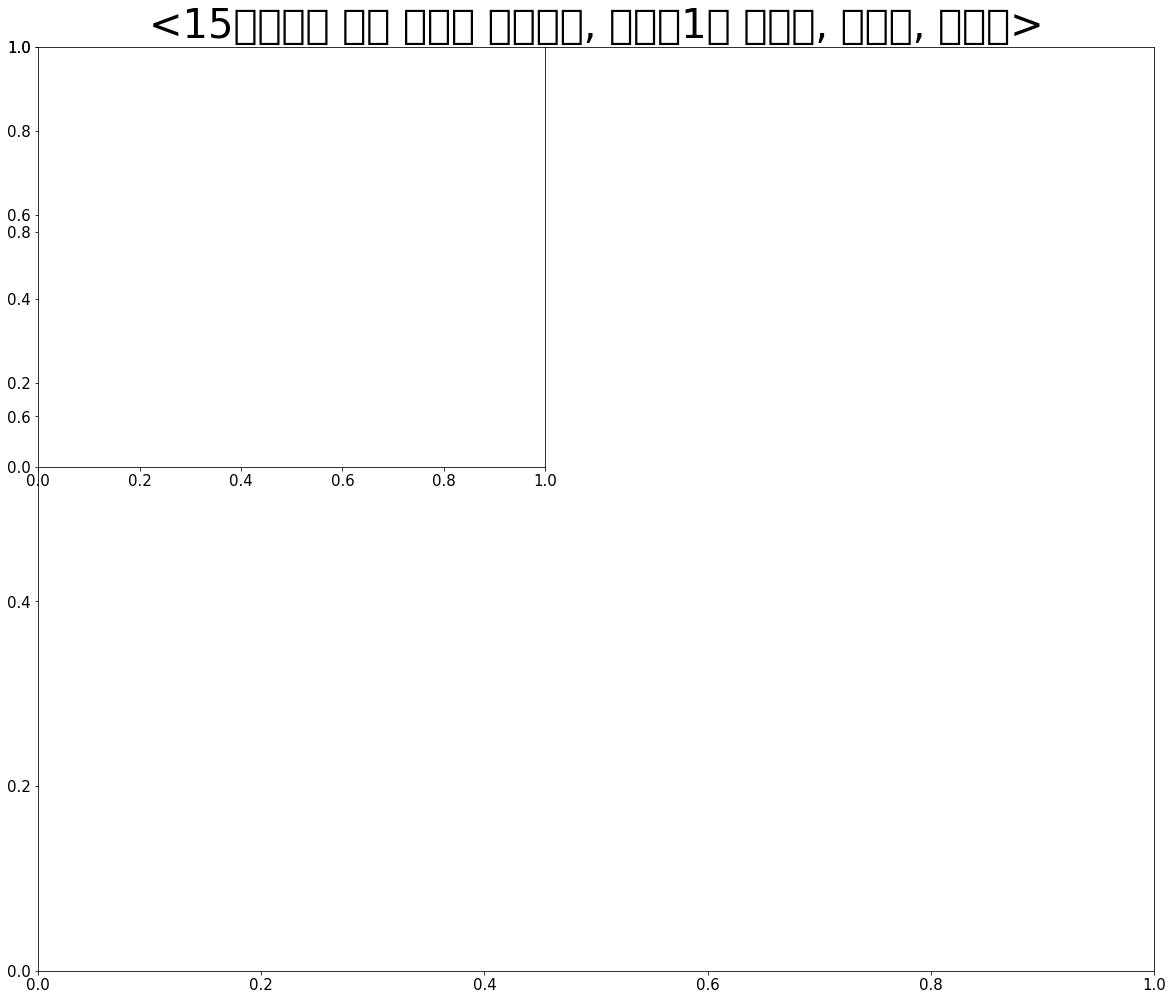

In [17]:
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (20, 15)
dat = dat.fillna(0)
# dat
dat.to_excel("today_corona_confirmed_ten.xlsx", index=False)
os.listdir( os.getcwd() )
df = pd.read_excel('today_corona_confirmed_ten.xlsx')
fig = plt.figure(figsize=(20,17))
plt.title('<15개국가에 따른 코로나 확진자수, 확진자1일 증가량, 발생률, 치명률>', size='40')
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(data=df, x='국가', y='확진자수')
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(data=df, x='국가', y='확진자1일')
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(data=df, x='국가', y='발생률')
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(data=df, x='국가', y='치명률')
plt.show()
